<a href="https://colab.research.google.com/github/aligilbert/AliData/blob/master/CAVIAR_network_clustering_and_betweenness_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name


In [11]:
print(G[1].nodes)
print(G[1].edges)

['n1', 'n4', 'n89', 'n83', 'n3', 'n5', 'n88', 'n85', 'n90', 'n2', 'n7', 'n54', 'n6', 'n64', 'n8']
[('n1', 'n4'), ('n1', 'n89'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n5'), ('n1', 'n88'), ('n1', 'n85'), ('n1', 'n90'), ('n1', 'n2'), ('n1', 'n54'), ('n1', 'n64'), ('n1', 'n8'), ('n89', 'n7'), ('n83', 'n6'), ('n3', 'n88'), ('n88', 'n85'), ('n88', 'n6'), ('n85', 'n6')]


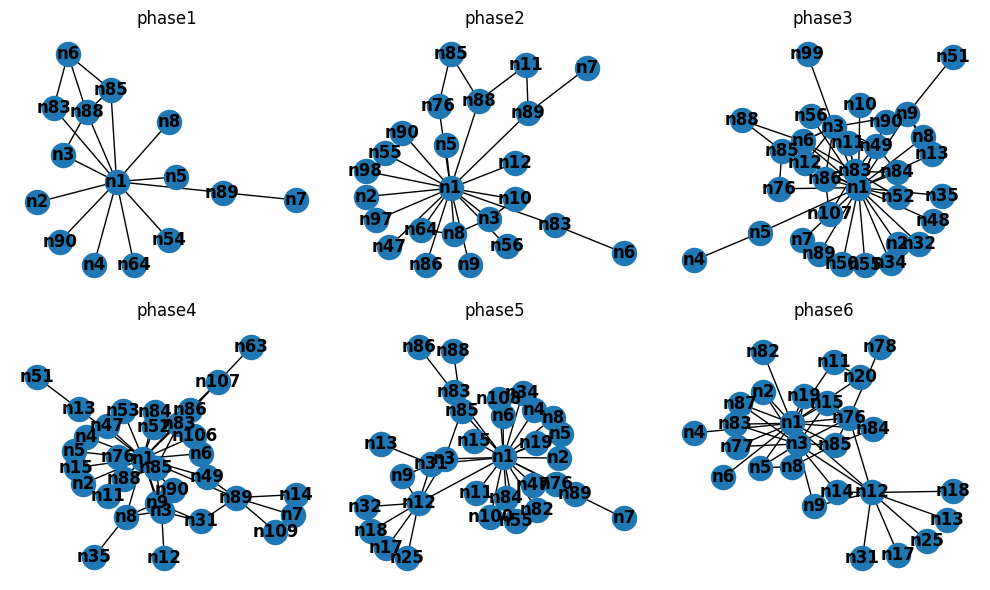

In [70]:
# prompt: show the phase diagrams 1-6, make them small enough to fit on screen

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for i in range(1, 7):
  ax = plt.subplot(2, 3, i)
  nx.draw(G[i], with_labels=True, font_weight='bold', ax=ax)
  ax.set_title(G[i].name)
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()


['n1', 'n4', 'n83', 'n3', 'n5', 'n88', 'n85', 'n62', 'n9', 'n2', 'n6', 'n8', 'n55', 'n76', 'n34', 'n11', 'n12', 'n14', 'n18', 'n17', 'n19', 'n78', 'n77', 'n87', 'n20', 'n22', 'n74', 'n79', 'n69', 'n61', 'n68', 'n16', 'n75', 'n28', 'n81', 'n15']
[('n1', 'n4'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n5'), ('n1', 'n85'), ('n1', 'n62'), ('n1', 'n9'), ('n1', 'n2'), ('n1', 'n6'), ('n1', 'n8'), ('n1', 'n55'), ('n1', 'n76'), ('n1', 'n34'), ('n1', 'n11'), ('n1', 'n14'), ('n1', 'n19'), ('n1', 'n77'), ('n1', 'n87'), ('n1', 'n20'), ('n1', 'n69'), ('n1', 'n68'), ('n1', 'n28'), ('n1', 'n81'), ('n1', 'n15'), ('n83', 'n3'), ('n83', 'n9'), ('n3', 'n88'), ('n3', 'n85'), ('n3', 'n9'), ('n3', 'n2'), ('n3', 'n19'), ('n3', 'n77'), ('n3', 'n87'), ('n3', 'n74'), ('n88', 'n85'), ('n85', 'n74'), ('n76', 'n19'), ('n76', 'n78'), ('n76', 'n79'), ('n76', 'n61'), ('n11', 'n20'), ('n12', 'n18'), ('n12', 'n17'), ('n12', 'n22'), ('n12', 'n16'), ('n12', 'n75'), ('n19', 'n77'), ('n78', 'n79'), ('n87', 'n81')]


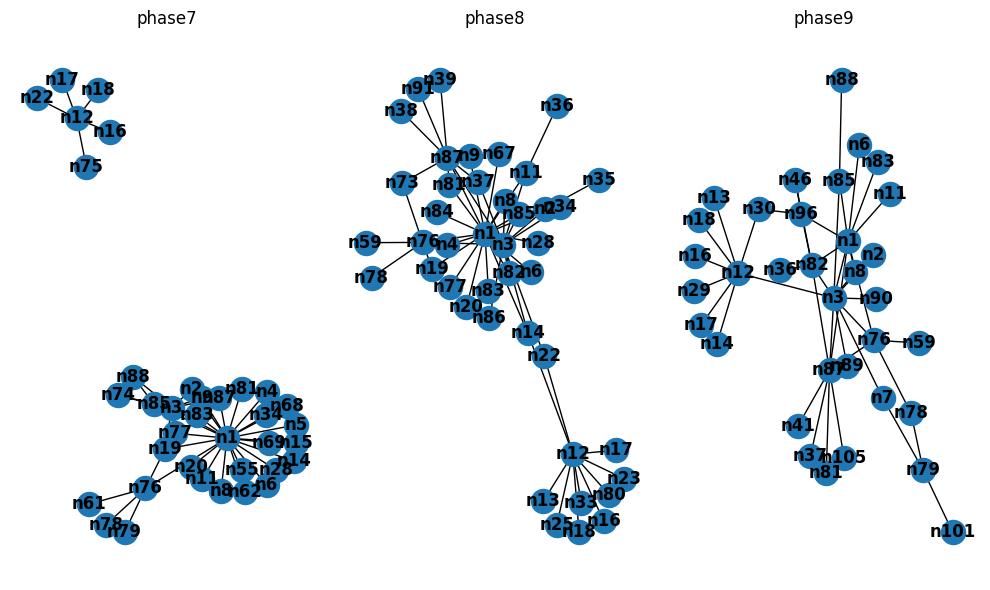

In [75]:
# prompt: do the same for 7,8,9

import pandas as pd
import matplotlib.pyplot as plt
phases = {}
G = {}
for i in range(7,10):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

print(G[7].nodes)
print(G[7].edges)

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
for i in range(7, 10):
  ax = plt.subplot(1, 3, i - 6)
  nx.draw(G[i], with_labels=True, font_weight='bold', ax=ax)
  ax.set_title(G[i].name)
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()


['n1', 'n4', 'n83', 'n3', 'n85', 'n86', 'n8', 'n76', 'n9', 'n84', 'n12', 'n14', 'n18', 'n17', 'n82', 'n19', 'n87', 'n22', 'n16', 'n81', 'n38', 'n73', 'n37', 'n24', 'n58', 'n96', 'n46', 'n105', 'n41', 'n21', 'n103', 'n104', 'n27', 'n95', 'n93', 'n42', 'n71', 'n40', 'n44', 'n45', 'n65', 'n70']
[('n1', 'n4'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n85'), ('n1', 'n8'), ('n1', 'n76'), ('n1', 'n84'), ('n1', 'n82'), ('n1', 'n87'), ('n1', 'n81'), ('n1', 'n37'), ('n1', 'n105'), ('n1', 'n70'), ('n83', 'n86'), ('n85', 'n76'), ('n85', 'n84'), ('n8', 'n9'), ('n76', 'n71'), ('n12', 'n14'), ('n12', 'n18'), ('n12', 'n17'), ('n12', 'n22'), ('n12', 'n16'), ('n12', 'n24'), ('n12', 'n65'), ('n14', 'n24'), ('n14', 'n58'), ('n82', 'n87'), ('n82', 'n37'), ('n82', 'n96'), ('n82', 'n46'), ('n19', 'n71'), ('n87', 'n81'), ('n87', 'n38'), ('n87', 'n73'), ('n87', 'n37'), ('n87', 'n105'), ('n87', 'n41'), ('n87', 'n21'), ('n87', 'n27'), ('n87', 'n40'), ('n37', 'n41'), ('n37', 'n95'), ('n37', 'n93'), ('n37', 'n42'), ('

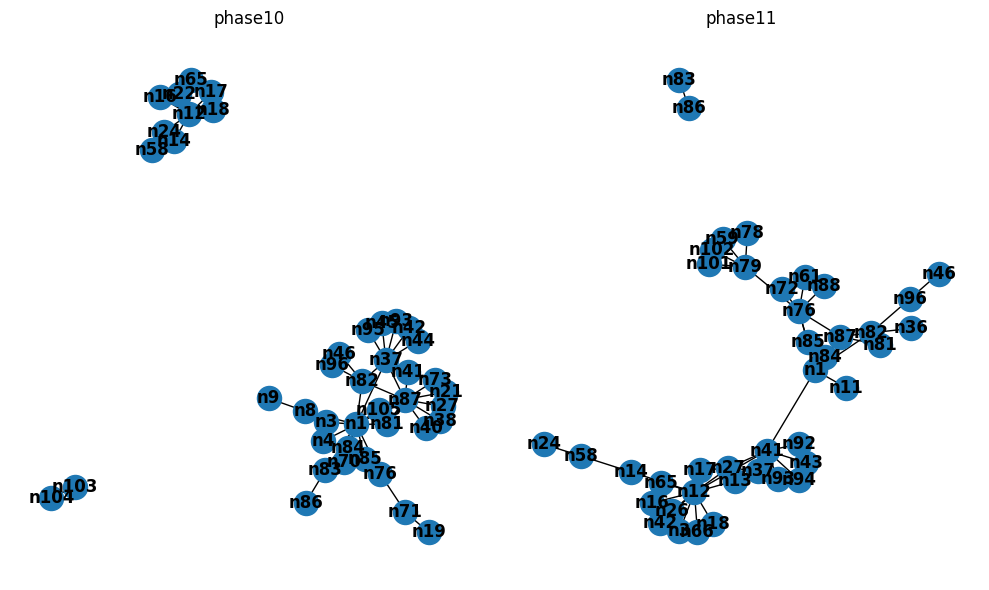

In [76]:
# prompt: do same as above for phase 10 and phase 11

import pandas as pd
import matplotlib.pyplot as plt
phases = {}
G = {}
for i in range(10,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

print(G[10].nodes)
print(G[10].edges)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(10, 12):
  ax = plt.subplot(1, 2, i - 9)
  nx.draw(G[i], with_labels=True, font_weight='bold', ax=ax)
  ax.set_title(G[i].name)
  ax.set_xticks([])
  ax.set_yticks([])
plt.tight_layout()


In [3]:
# prompt: now make a matrix with phase number as columns and nodes listed in ascending order (n1, n2, n3, n4, n5, n6, n7, etc) as rows, use a null if the node is not present in the phase. Here are the conditions: sort_key function extracts all sequences of digits (\d+) and non-digits (\D+) from each string.
# It converts the digit sequences to integers so they can be sorted numerically

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

nodes = sorted(G[1].nodes, key=lambda x: int(x[1:]))

phase_matrix = pd.DataFrame(columns=[f"phase{i}" for i in range(1, 12)], index=nodes)
for i in range(1, 12):
  for node in nodes:
    if node in G[i].nodes:
      phase_matrix.loc[node, f"phase{i}"] = 1
    else:
      phase_matrix.loc[node, f"phase{i}"] = np.nan

print(phase_matrix)


    phase1 phase2 phase3 phase4 phase5 phase6 phase7 phase8 phase9 phase10  \
n1       1      1      1      1      1      1      1      1      1       1   
n2       1      1      1      1      1      1      1      1      1     NaN   
n3       1      1      1      1      1      1      1      1      1       1   
n4       1    NaN      1      1      1      1      1      1    NaN       1   
n5       1      1      1      1      1      1      1    NaN    NaN     NaN   
n6       1      1      1      1      1      1      1      1      1     NaN   
n7       1      1      1      1      1    NaN    NaN    NaN      1     NaN   
n8       1      1      1      1      1      1      1      1      1       1   
n54      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
n64      1      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
n83      1      1      1      1      1      1      1      1      1       1   
n85      1      1      1      1      1      1      1      1     

In [12]:
print(G[1])

Graph named 'phase1' with 15 nodes and 18 edges


In [15]:
x = nx.betweenness_centrality(G[i], normalized = True)

In [16]:
 formatted_output = f"G(i):\n"

In [17]:
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
betweenness_centrality_phase9 = nx.betweenness_centrality(G[9])

# Print results with phase number
print("Phase 9 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase9.items():
    print(f"Node '{node}': {betweenness}")

Phase 9 Betweenness Centralities:
Node 'n1': 0.2490530303030303
Node 'n89': 0.0
Node 'n83': 0.0
Node 'n3': 0.5762310606060607
Node 'n88': 0.0
Node 'n85': 0.06060606060606061
Node 'n90': 0.0
Node 'n2': 0.0
Node 'n7': 0.08775252525252526
Node 'n6': 0.0
Node 'n8': 0.0
Node 'n76': 0.13194444444444445
Node 'n11': 0.0
Node 'n13': 0.0
Node 'n12': 0.3573232323232323
Node 'n14': 0.0
Node 'n18': 0.0
Node 'n17': 0.0
Node 'n82': 0.11568813131313133
Node 'n78': 0.025883838383838384
Node 'n87': 0.2362689393939394
Node 'n79': 0.0625
Node 'n16': 0.0
Node 'n81': 0.0
Node 'n59': 0.0
Node 'n37': 0.0
Node 'n36': 0.0
Node 'n96': 0.038983585858585856
Node 'n46': 0.0
Node 'n29': 0.0
Node 'n30': 0.019886363636363636
Node 'n105': 0.0
Node 'n101': 0.0
Node 'n41': 0.0


In [18]:
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
betweenness_centrality_phase3 = nx.betweenness_centrality(G[3])

# Print results with phase number
print("Phase 3 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase3.items():
    print(f"Node '{node}': {betweenness}")

Phase 3 Betweenness Centralities:
Node 'n1': 0.829502688172043
Node 'n4': 0.0
Node 'n89': 0.0
Node 'n83': 0.046572580645161295
Node 'n3': 0.09549731182795697
Node 'n5': 0.0625
Node 'n48': 0.0
Node 'n88': 0.0006720430107526881
Node 'n85': 0.029973118279569885
Node 'n90': 0.0
Node 'n86': 0.028024193548387095
Node 'n2': 0.0010080645161290322
Node 'n7': 0.0
Node 'n6': 0.03333333333333333
Node 'n8': 0.0
Node 'n55': 0.0
Node 'n10': 0.0
Node 'n56': 0.0
Node 'n76': 0.0
Node 'n9': 0.06754032258064516
Node 'n34': 0.0
Node 'n35': 0.0
Node 'n11': 0.0008064516129032258
Node 'n32': 0.0
Node 'n84': 0.0006720430107526881
Node 'n49': 0.007526881720430107
Node 'n107': 0.0
Node 'n50': 0.0
Node 'n99': 0.0
Node 'n13': 0.0
Node 'n51': 0.0
Node 'n12': 0.0
Node 'n52': 0.0


In [20]:
 formatted_output = f"G(i):\n"

In [21]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
eigenvector_centrality_phase9 = nx.eigenvector_centrality(G[9])

# Print results with phase number
print("Phase 9 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase9.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 9 Eiganvector Centralities:
Node 'n1': 0.4589575176167989
Node 'n89': 0.09358743865951574
Node 'n83': 0.09178102356758051
Node 'n3': 0.4679877147323067
Node 'n88': 0.03861377605182318
Node 'n85': 0.19309035604069172
Node 'n90': 0.09358743865951574
Node 'n2': 0.09358743865951574
Node 'n7': 0.1004095105321829
Node 'n6': 0.09178102356758051
Node 'n8': 0.18536846222709621
Node 'n76': 0.28270679857238745
Node 'n11': 0.09178102356758051
Node 'n13': 0.028130113615355567
Node 'n12': 0.14065936326685183
Node 'n14': 0.028130113615355567
Node 'n18': 0.028130113615355567
Node 'n17': 0.028130113615355567
Node 'n82': 0.3313841025326668
Node 'n78': 0.06335699656358872
Node 'n87': 0.36685585850760893
Node 'n79': 0.034114004534771605
Node 'n16': 0.028130113615355567
Node 'n81': 0.07336272049522029
Node 'n59': 0.05653492469092155
Node 'n37': 0.07336272049522029
Node 'n36': 0.06626926372887099
Node 'n96': 0.1923098059613257
Node 'n46': 0.10472691184306128
Node 'n29': 0.028130113615355567
Node 'n30'

In [22]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase3 = nx.eigenvector_centrality(G[3])

# Print results with phase number
print("Phase 3 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase3.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 3 Eiganvector Centralities:
Node 'n1': 0.5938791958045414
Node 'n4': 0.014355434541900984
Node 'n89': 0.10779841864618867
Node 'n83': 0.2774973009007579
Node 'n3': 0.291304887672891
Node 'n5': 0.09344298411402496
Node 'n48': 0.09123754828984905
Node 'n88': 0.05360468578884205
Node 'n85': 0.16206747439619537
Node 'n90': 0.12623746000076858
Node 'n86': 0.18964754653259738
Node 'n2': 0.12517975378436813
Node 'n7': 0.10779841864618867
Node 'n6': 0.1868573648241205
Node 'n8': 0.11835643320921982
Node 'n55': 0.09123754828984905
Node 'n10': 0.09123754828984905
Node 'n56': 0.09123754828984905
Node 'n76': 0.11613568713220572
Node 'n9': 0.17652251473120775
Node 'n34': 0.11046871892110087
Node 'n35': 0.09123754828984905
Node 'n11': 0.17862208073125885
Node 'n32': 0.11046871892110087
Node 'n84': 0.19401421412059242
Node 'n49': 0.22782181913316768
Node 'n107': 0.07176681246995305
Node 'n50': 0.09123754828984905
Node 'n99': 0.044752920727746365
Node 'n13': 0.11835643320921982
Node 'n51': 0.027

In [23]:
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase5 = nx.eigenvector_centrality(G[5])

# Print results with phase number
print("Phase 5 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase5.items():
    print(f"Node '{node}': {eigenvector_centrality}")

Phase 5 Eiganvector Centralities:
Node 'n1': 0.6401993761481248
Node 'n4': 0.1220956125299768
Node 'n89': 0.15678681142594514
Node 'n83': 0.12670416137094886
Node 'n3': 0.27567497015479786
Node 'n5': 0.1508688339363215
Node 'n88': 0.03457022846234927
Node 'n85': 0.18126451122566808
Node 'n86': 0.024164672574690245
Node 'n2': 0.1220956125299768
Node 'n7': 0.0299018769886424
Node 'n6': 0.1508688339363215
Node 'n8': 0.1508688339363215
Node 'n55': 0.1220956125299768
Node 'n47': 0.1220956125299768
Node 'n76': 0.15199748951861922
Node 'n9': 0.10616227021857665
Node 'n34': 0.1220956125299768
Node 'n11': 0.1220956125299768
Node 'n32': 0.053586443984483444
Node 'n84': 0.1220956125299768
Node 'n13': 0.04517580252398115
Node 'n31': 0.23687363674741718
Node 'n12': 0.28097336780165977
Node 'n108': 0.1508688339363215
Node 'n100': 0.1220956125299768
Node 'n18': 0.053586443984483444
Node 'n17': 0.053586443984483444
Node 'n25': 0.053586443984483444
Node 'n82': 0.1220956125299768
Node 'n19': 0.122095612

In [24]:
import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

  create_using = nx.DiGraph()
  nx.algorithms.link_analysis.hits(G[i], max_iter=1000000)

print(G[1])
print(hits)

Graph named 'phase1' with 15 nodes and 18 edges
<function hits at 0x79899aae28c0>


In [25]:
# prompt: how to show hub scores and authority for each phase in G[i]

import networkx as nx

# Define a function to calculate hub and authority scores
def calculate_hubs_authorities(G):
  hubs, authorities = nx.hits(G)
  return hubs, authorities

# Calculate hub and authority scores for each phase
hubs_authorities = {}
for i in range(1, 12):
  hubs, authorities = calculate_hubs_authorities(G[i])
  hubs_authorities[i] = {"hubs": hubs, "authorities": authorities}

# Print the hub and authority scores for each phase
for i in range(1, 12):
  print(f"Phase {i}:")
  print(f"Hubs: {hubs_authorities[i]['hubs']}")
  print(f"Authorities: {hubs_authorities[i]['authorities']}")


Phase 1:
Hubs: {'n1': 0.18725288268260326, 'n4': 0.04796976504082523, 'n89': 0.05133895238272361, 'n83': 0.06555430682805015, 'n3': 0.07587619182703628, 'n5': 0.04796976504082523, 'n88': 0.10893442685495246, 'n85': 0.0934607336142612, 'n90': 0.04796976504082523, 'n2': 0.04796976504082523, 'n7': 0.013151826812811825, 'n54': 0.04796976504082523, 'n6': 0.06864232371178439, 'n64': 0.04796976504082523, 'n8': 0.04796976504082523}
Authorities: {'n1': 0.1872528826826032, 'n4': 0.047969765040825244, 'n89': 0.051338952382723645, 'n83': 0.06555430682805019, 'n3': 0.07587619182703631, 'n5': 0.047969765040825244, 'n88': 0.10893442685495247, 'n85': 0.09346073361426124, 'n90': 0.04796976504082525, 'n2': 0.047969765040825244, 'n7': 0.01315182681281183, 'n54': 0.04796976504082525, 'n6': 0.06864232371178434, 'n64': 0.04796976504082525, 'n8': 0.04796976504082525}
Phase 2:
Hubs: {'n1': 0.16770629581129332, 'n89': 0.042083323524267593, 'n83': 0.03789133643463866, 'n3': 0.05949794063168376, 'n5': 0.03613245

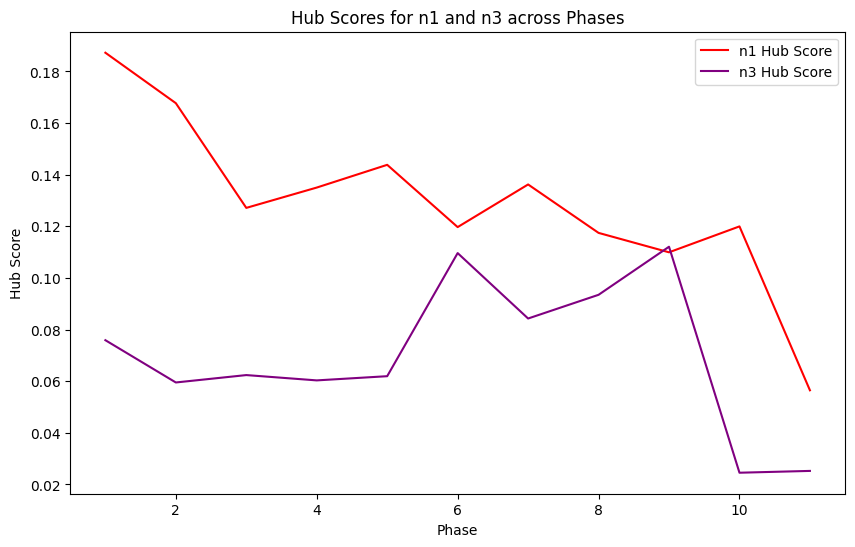

In [26]:
# prompt: now show me a line graph of the hub ascores for only n1 and n3 - color code the n1 hub score red and the n3 hub score purple solid

import matplotlib.pyplot as plt
# Extract hub scores for n1 and n3 for each phase
n1_hub_scores = []
n3_hub_scores = []
for i in range(1, 12):
  n1_hub_scores.append(hubs_authorities[i]["hubs"]["n1"])
  n3_hub_scores.append(hubs_authorities[i]["hubs"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_hub_scores, color="red", label="n1 Hub Score")
plt.plot(range(1, 12), n3_hub_scores, color="#800080", label="n3 Hub Score")

# Add labels and legend
plt.xlabel("Phase")
plt.ylabel("Hub Score")
plt.title("Hub Scores for n1 and n3 across Phases")
plt.legend()

# Show the plot
plt.show()


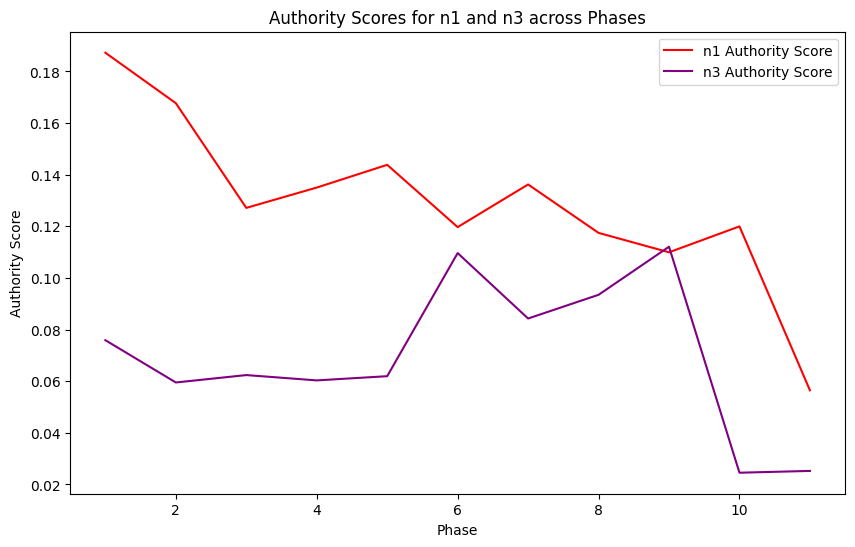

In [27]:
# prompt: now show me a line graph of the authority ascores for only n1 and n3 - color code the n1 hub score red and the n3 hub score purple solid

import matplotlib.pyplot as plt
# Extract authority scores for n1 and n3 for each phase
n1_authority_scores = []
n3_authority_scores = []
for i in range(1, 12):
  n1_authority_scores.append(hubs_authorities[i]["authorities"]["n1"])
  n3_authority_scores.append(hubs_authorities[i]["authorities"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_authority_scores, color="red", label="n1 Authority Score")
plt.plot(range(1, 12), n3_authority_scores, color="#800080", label="n3 Authority Score")

# Add labels and legend
plt.xlabel("Phase")
plt.ylabel("Authority Score")
plt.title("Authority Scores for n1 and n3 across Phases")
plt.legend()

# Show the plot
plt.show()


['n1', 'n4', 'n89', 'n83', 'n3', 'n5', 'n88', 'n85', 'n90', 'n2', 'n7', 'n54', 'n6', 'n64', 'n8']
[('n1', 'n4'), ('n1', 'n89'), ('n1', 'n83'), ('n1', 'n3'), ('n1', 'n5'), ('n1', 'n88'), ('n1', 'n85'), ('n1', 'n90'), ('n1', 'n2'), ('n1', 'n54'), ('n1', 'n64'), ('n1', 'n8'), ('n89', 'n7'), ('n83', 'n6'), ('n3', 'n88'), ('n88', 'n85'), ('n88', 'n6'), ('n85', 'n6')]
    phase1 phase2 phase3 phase4 phase5 phase6 phase7 phase8 phase9 phase10  \
n1       1      1      1      1      1      1      1      1      1       1   
n2       1      1      1      1      1      1      1      1      1     NaN   
n3       1      1      1      1      1      1      1      1      1       1   
n4       1    NaN      1      1      1      1      1      1    NaN       1   
n5       1      1      1      1      1      1      1    NaN    NaN     NaN   
n6       1      1      1      1      1      1      1      1      1     NaN   
n7       1      1      1      1      1    NaN    NaN    NaN      1     NaN   
n8       1 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

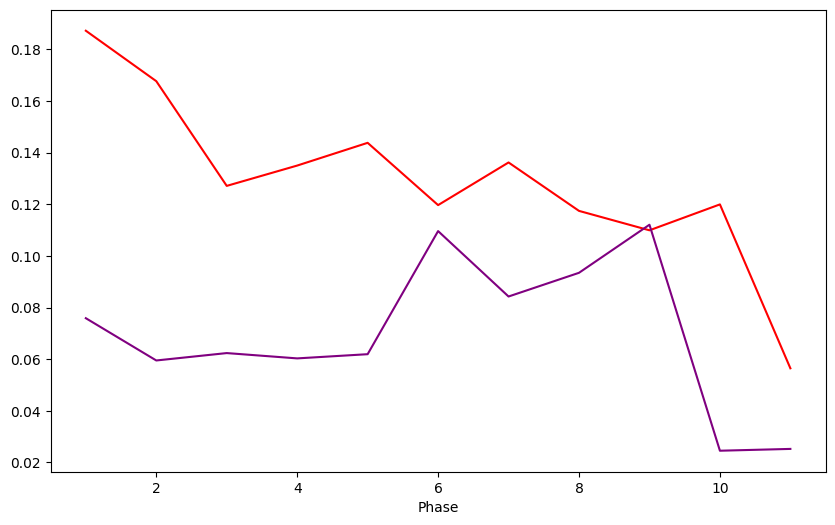

In [28]:
# prompt: how to do spectral clustering across the phases of the dataset, missing values should be filled in with zeros, pre-process data so it fits, NaN values should be changed to zero

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

print(G[1].nodes)
print(G[1].edges)


phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

nodes = sorted(G[1].nodes, key=lambda x: int(x[1:]))

phase_matrix = pd.DataFrame(columns=[f"phase{i}" for i in range(1, 12)], index=nodes)
for i in range(1, 12):
  for node in nodes:
    if node in G[i].nodes:
      phase_matrix.loc[node, f"phase{i}"] = 1
    else:
      phase_matrix.loc[node, f"phase{i}"] = np.nan

print(phase_matrix)

print(G[1])
num_nodes = len(G[i].nodes())

    # Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G[i])

    # Calculate mean centrality score (example with degree centrality)
centrality_scores = nx.degree_centrality(G[i]).values()
mean_centrality = sum(centrality_scores) / len(centrality_scores)

    # Append statistics to list
graph_stats = []
graph_stats.append({
        'Phase': var_name,
        'Number_of_nodes': num_nodes,
        'Clustering_coefficient': clustering_coefficient,
        'Mean_centrality_score': mean_centrality
    })

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(graph_stats)

# Display the DataFrame
print(df)
print
x = nx.betweenness_centrality(G[i], normalized = True)
formatted_output = f"G(i):\n"
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
betweenness_centrality_phase9 = nx.betweenness_centrality(G[9])

# Print results with phase number
print("Phase 9 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase9.items():
    print(f"Node '{node}': {betweenness}")
# Iterate over each item in the data list
for node, betweenness_centrality in x.items():
  formatted_output += f"'{node}': {betweenness_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
betweenness_centrality_phase3 = nx.betweenness_centrality(G[3])

# Print results with phase number
print("Phase 3 Betweenness Centralities:")
for node, betweenness in betweenness_centrality_phase3.items():
    print(f"Node '{node}': {betweenness}")
x = nx.eigenvector_centrality(G[i])
formatted_output = f"G(i):\n"
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 9
eigenvector_centrality_phase9 = nx.eigenvector_centrality(G[9])

# Print results with phase number
print("Phase 9 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase9.items():
    print(f"Node '{node}': {eigenvector_centrality}")

# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase3 = nx.eigenvector_centrality(G[3])

# Print results with phase number
print("Phase 3 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase3.items():
    print(f"Node '{node}': {eigenvector_centrality}")
# Iterate over each item in the data list
for node, eigenvector_centrality in x.items():
  formatted_output += f"'{node}': {eigenvector_centrality}\n"

# Print the formatted output
# Calculate betweenness centrality for Phase 3
eigenvector_centrality_phase5 = nx.eigenvector_centrality(G[5])

# Print results with phase number
print("Phase 5 Eiganvector Centralities:")
for node, eigenvector_centrality in eigenvector_centrality_phase5.items():
    print(f"Node '{node}': {eigenvector_centrality}")

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

  create_using = nx.DiGraph()
  nx.algorithms.link_analysis.hits(G[i], max_iter=1000000)

print(G[1])
print(hits)


# Define a function to calculate hub and authority scores
def calculate_hubs_authorities(G):
  hubs, authorities = nx.hits(G)
  return hubs, authorities

# Calculate hub and authority scores for each phase
hubs_authorities = {}
for i in range(1, 12):
  hubs, authorities = calculate_hubs_authorities(G[i])
  hubs_authorities[i] = {"hubs": hubs, "authorities": authorities}

# Print the hub and authority scores for each phase
for i in range(1, 12):
  print(f"Phase {i}:")
  print(f"Hubs: {hubs_authorities[i]['hubs']}")
  print(f"Authorities: {hubs_authorities[i]['authorities']}")


# Extract hub scores for n1 and n3 for each phase
n1_hub_scores = []
n3_hub_scores = []
for i in range(1, 12):
  n1_hub_scores.append(hubs_authorities[i]["hubs"]["n1"])
  n3_hub_scores.append(hubs_authorities[i]["hubs"]["n3"])

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), n1_hub_scores, color="red", label="n1 Hub Score")
plt.plot(range(1, 12), n3_hub_scores, color="#800080", label="n3 Hub Score")

# Add labels and legend
plt.xlabel("Phase")
plt

In [30]:
# prompt: now analyse clusters across phases , if not connected then specify new clustering
!pip install scikit-learn

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx
from sklearn.cluster import SpectralClustering

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

# Initialize an empty dictionary to store cluster information for each phase
clusters_by_phase = {}
connected_components = {} # Initialize the connected_components dictionary

# Loop through each phase
for i in range(1, 12):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Store the cluster labels for the current phase
  clusters_by_phase[i] = clusters
  # Calculate the number of connected components
  connected_components[i] = nx.number_connected_components(G[i])

# Check for disconnected clusters across phases
for i in range(1, 12):
  for j in range(i+1, 12):
    # Compare the clusters of two consecutive phases
    clusters_phase_i = clusters_by_phase[i]
    clusters_phase_j = clusters_by_phase[j]

    # Identify nodes that have changed clusters between phases
    changed_nodes = [node for node in range(len(clusters_phase_i)) if clusters_phase_i[node] != clusters_phase_j[node]]

    # If there are changed nodes, specify new clustering
    if len(changed_nodes) > 0:
      print(f"New clustering required between phases {i} and {j}:")
      print(f"Changed nodes: {changed_nodes}")

# Check for disconnected components and perform community detection if needed
for i in range(1, 12):
  if connected_components[i] > 1:
    communities = nx.community.greedy_modularity_communities(G[i])
    print(f"Phase {i} has {connected_components[i]} connected components. Detected communities:")
    for j, community in enumerate(communities):
      print(f"Community {j+1}: {community}")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


New clustering required between phases 1 and 2:
Changed nodes: [0, 6, 8, 9, 10, 11, 13, 14]
New clustering required between phases 1 and 3:
Changed nodes: [0, 6, 8, 9, 10, 11, 12, 13, 14]
New clustering required between phases 1 and 4:
Changed nodes: [0, 1, 2, 3, 5, 8, 9, 10, 13, 14]
New clustering required between phases 1 and 5:
Changed nodes: [2, 3, 8, 10, 12]
New clustering required between phases 1 and 6:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
New clustering required between phases 1 and 7:
Changed nodes: [0, 1, 2, 5, 8, 9, 10, 11, 13, 14]
New clustering required between phases 1 and 8:
Changed nodes: [2, 3, 4, 6, 7, 9, 12]
New clustering required between phases 1 and 9:
Changed nodes: [2, 3, 4, 6, 7, 8, 10, 12, 13, 14]
New clustering required between phases 1 and 10:
Changed nodes: [0, 1, 2, 5, 8, 9, 11, 12, 13, 14]
New clustering required between phases 1 and 11:
Changed nodes: [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14]
New clustering required between phases 2 

IndexError: index 32 is out of bounds for axis 0 with size 32

In [31]:
# prompt: now analyse clusters across phases , if not connected then specify new clustering
!pip install scikit-learn

import pandas as pd
import networkx as nx  # Import networkx as nx
import itertools
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from networkx.algorithms.link_analysis import hits
import networkx as nx
from sklearn.cluster import SpectralClustering

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

# Initialize an empty dictionary to store cluster information for each phase
clusters_by_phase = {}
connected_components = {} # Initialize the connected_components dictionary

# Loop through each phase
for i in range(1, 12):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Store the cluster labels for the current phase
  clusters_by_phase[i] = clusters
  # Calculate the number of connected components
  connected_components[i] = nx.number_connected_components(G[i])

# Check for disconnected clusters across phases
for i in range(1, 12):
  for j in range(i+1, 12):
    # Compare the clusters of two consecutive phases
    clusters_phase_i = clusters_by_phase[i]
    clusters_phase_j = clusters_by_phase[j]

    # Find the common nodes between the two phases
    common_nodes = set(range(len(clusters_phase_i))) & set(range(len(clusters_phase_j)))

    # Identify nodes that have changed clusters between phases, considering only common nodes
    changed_nodes = [node for node in common_nodes if clusters_phase_i[node] != clusters_phase_j[node]]

    # If there are changed nodes, specify new clustering
    if len(changed_nodes) > 0:
      print(f"New clustering required between phases {i} and {j}:")
      print(f"Changed nodes: {changed_nodes}")

# Check for disconnected components and perform community detection if needed
for i in range(1, 12):
  if connected_components[i] > 1:
    communities = nx.community.greedy_modularity_communities(G[i])
    print(f"Phase {i} has {connected_components[i]} connected components. Detected communities:")
    for j, community in enumerate(communities):
      print(f"Community {j+1}: {community}")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


New clustering required between phases 1 and 2:
Changed nodes: [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]
New clustering required between phases 1 and 3:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 14]
New clustering required between phases 1 and 4:
Changed nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14]
New clustering required between phases 1 and 5:
Changed nodes: [2, 4, 6, 7, 8, 10, 12]
New clustering required between phases 1 and 6:
Changed nodes: [2, 3, 4, 6, 7, 11, 12, 13, 14]
New clustering required between phases 1 and 7:
Changed nodes: [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14]
New clustering required between phases 1 and 8:
Changed nodes: [2, 3, 4, 6, 7, 9, 10, 12]
New clustering required between phases 1 and 9:
Changed nodes: [2, 3, 4, 6, 7, 8, 10, 12, 13, 14]
New clustering required between phases 1 and 10:
Changed nodes: [2, 3, 4, 6, 7, 10, 11, 13]
New clustering required between phases 1 and 11:
Changed nodes: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13]
New clustering

In [32]:
# prompt: are any of the detected communities in phase 7, 10 or 11 the same?

# Compare communities in phases 7, 10, and 11
communities_phase_7 = nx.community.greedy_modularity_communities(G[7])
communities_phase_10 = nx.community.greedy_modularity_communities(G[10])
communities_phase_11 = nx.community.greedy_modularity_communities(G[11])

# Check for any common communities between phases
common_communities = set(communities_phase_7) & set(communities_phase_10) & set(communities_phase_11)

# Print the common communities
if len(common_communities) > 0:
  print("Common communities found in phases 7, 10, and 11:")
  for community in common_communities:
    print(community)
else:
  print("No common communities found in phases 7, 10, and 11.")


No common communities found in phases 7, 10, and 11.


In [116]:
individuals = {
    1: "Daniel Serero",
    2: "n2",
    3: "Pierre Perlini",
    4: "n4",
    5: "Richard Gleeson",
    6: "Gaspard Lino",
    7: "n7",
    8: "Bruno de Quinzio",
    9: "n9",
    10: "n10",
    11: "Samir Rabbat",
    12: "Ernesto Morales",
    13: "n13",
    14: "n14",
    15: "n15",
    16: "Johnny Pacheco",
    17: "Oscar Nieri",
    18: "n18",
    19: "n19",
    20: "n20",
    21: "n21",
    22: "n22",
    23: "n23",
    24: "n24",
    25: "n25",
    26: "n26",
    27: "n27",
    28: "n28",
    29: "n29",
    30: "n30",
    31: "n31",
    32: "n32",
    33: "Ricardo Negrinotti",
    34: "n34",
    35: "n35",
    36: "n36",
    37: "n37",
    38: "n38",
    39: "n39",
    40: "n40",
    41: "n41",
    42: "n42",
    43: "n43",
    44: "n44",
    45: "n45",
    46: "n46",
    47: "n47",
    48: "n48",
    49: "n49",
    50: "n50",
    51: "n51",
    52: "n52",
    53: "n53",
    54: "n54",
    55: "n55",
    56: "n56",
    57: "n57",
    58: "n58",
    59: "n59",
    60: "n60",
    61: "n61",
    62: "n62",
    63: "n63",
    64: "n64",
    65: "n65",
    66: "n66",
    67: "n67",
    68: "n68",
    69: "n69",
    70: "n70",
    71: "n71",
    72: "n72",
    73: "n73",
    74: "n74",
    75: "n75",
    76: "Gabrielle Casale",
    77: "Roderik Janouska",
    78: "n78",
    79: "n79",
    80: "Richard Brebner",
    81: "n81",
    82: "Salvatore Panetta",
    83: "Alain Levy",
    84: "Mohammed Echouafni",
    86: "Gérard Levy",
    85: "Wallace Lee",
    87: "Patrick Lee",
    88: "Lee Gilbert",
    89: "Antonio Iannacci",
    90: "n90",
    91: "n91",
    92: "n92",
    93: "n93",
    94: "n94",
    95: "n95",
    96: "Steve Cunha",
    97: "n97",
    98: "n98",
    99: "n99",
    100: "n100",
    101: "n101",
    102: "n102",
    103: "n103",
    104: "n104",
    105: "n105",
    106: "Beverly Ashton",
    107: "n107",
    108: "n108",
    109: "n109",
    110: "110"
}

phases = {}
G = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  phases[i].columns = [individuals.get(int(j),j) for j in phases[i].columns]
  phases[i].index = [individuals.get(int(j),j) for j in phases[i].index]
    # rename(index=individuals, columns=individuals, inplace=True)

  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

Cluster labels for phase 1:
Node 1: Cluster 3
Node 2: Cluster 2
Node 3: Cluster 4
Node 4: Cluster 5
Node 5: Cluster 1
Node 6: Cluster 3
Node 7: Cluster 1
Node 8: Cluster 1
Node 9: Cluster 2
Node 10: Cluster 3
Node 11: Cluster 4
Node 12: Cluster 3
Node 13: Cluster 5
Node 14: Cluster 3
Node 15: Cluster 3


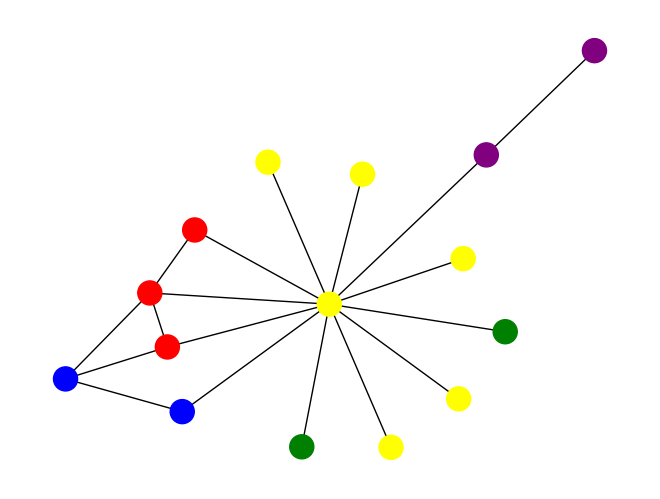

In [117]:
# prompt: cluster analysis of only phase 1

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 1
adjacency_matrix = nx.adjacency_matrix(G[1]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 1
print("Cluster labels for phase 1:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[1], node_color=node_color)
plt.show()


Cluster labels for phase 2:
Node 1: Cluster 5
Node 2: Cluster 2
Node 3: Cluster 3
Node 4: Cluster 1
Node 5: Cluster 5
Node 6: Cluster 4
Node 7: Cluster 4
Node 8: Cluster 5
Node 9: Cluster 5
Node 10: Cluster 5
Node 11: Cluster 2
Node 12: Cluster 3
Node 13: Cluster 1
Node 14: Cluster 1
Node 15: Cluster 5
Node 16: Cluster 1
Node 17: Cluster 5
Node 18: Cluster 5
Node 19: Cluster 5
Node 20: Cluster 5
Node 21: Cluster 4
Node 22: Cluster 5
Node 23: Cluster 2
Node 24: Cluster 5


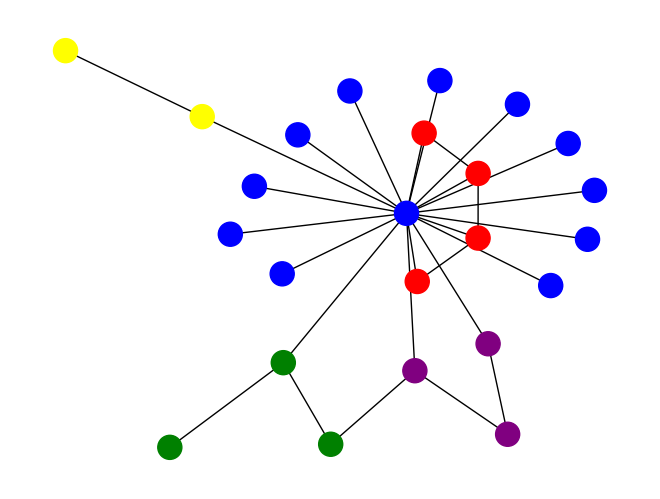

In [118]:
# prompt: cluster analysis of only phase 2

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 2
adjacency_matrix = nx.adjacency_matrix(G[2]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 2
print("Cluster labels for phase 2:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[2], node_color=node_color)
plt.show()



Cluster labels for phase 3:
Node 1: Cluster 1
Node 2: Cluster 4
Node 3: Cluster 1
Node 4: Cluster 5
Node 5: Cluster 3
Node 6: Cluster 4
Node 7: Cluster 1
Node 8: Cluster 3
Node 9: Cluster 3
Node 10: Cluster 5
Node 11: Cluster 5
Node 12: Cluster 1
Node 13: Cluster 1
Node 14: Cluster 3
Node 15: Cluster 2
Node 16: Cluster 1
Node 17: Cluster 1
Node 18: Cluster 1
Node 19: Cluster 3
Node 20: Cluster 2
Node 21: Cluster 1
Node 22: Cluster 1
Node 23: Cluster 5
Node 24: Cluster 1
Node 25: Cluster 5
Node 26: Cluster 5
Node 27: Cluster 5
Node 28: Cluster 1
Node 29: Cluster 3
Node 30: Cluster 2
Node 31: Cluster 2
Node 32: Cluster 3
Node 33: Cluster 5


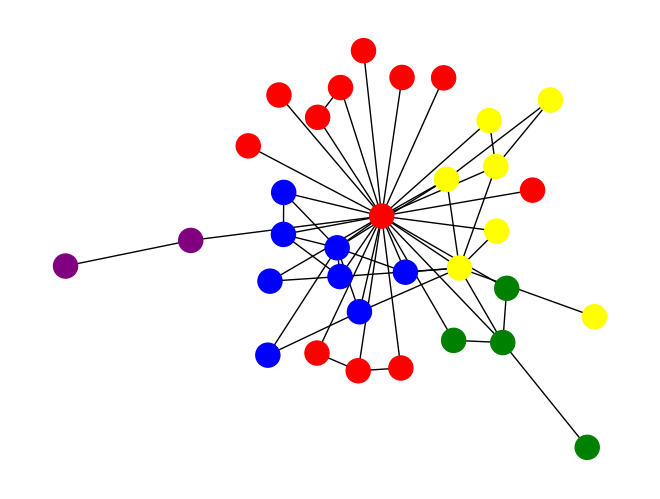

In [119]:
# prompt: cluster analysis of only phase 3

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 3
adjacency_matrix = nx.adjacency_matrix(G[3]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 3
print("Cluster labels for phase 3:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[3], node_color=node_color)
plt.show()



Cluster labels for phase 4:
Node 1: Cluster 2
Node 2: Cluster 2
Node 3: Cluster 4
Node 4: Cluster 2
Node 5: Cluster 1
Node 6: Cluster 2
Node 7: Cluster 2
Node 8: Cluster 2
Node 9: Cluster 1
Node 10: Cluster 5
Node 11: Cluster 2
Node 12: Cluster 4
Node 13: Cluster 2
Node 14: Cluster 1
Node 15: Cluster 2
Node 16: Cluster 2
Node 17: Cluster 1
Node 18: Cluster 1
Node 19: Cluster 2
Node 20: Cluster 2
Node 21: Cluster 2
Node 22: Cluster 4
Node 23: Cluster 5
Node 24: Cluster 3
Node 25: Cluster 3
Node 26: Cluster 5
Node 27: Cluster 4
Node 28: Cluster 1
Node 29: Cluster 1
Node 30: Cluster 4
Node 31: Cluster 2
Node 32: Cluster 2
Node 33: Cluster 2


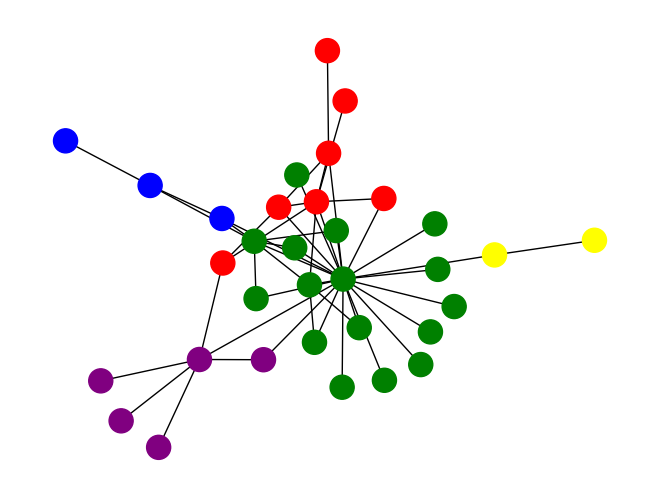

In [120]:
# prompt: cluster analysis of only phase 4

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 4
adjacency_matrix = nx.adjacency_matrix(G[4]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 4
print("Cluster labels for phase 4:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[4], node_color=node_color)
plt.show()



Cluster labels for phase 5:
Node 1: Cluster 2
Node 2: Cluster 2
Node 3: Cluster 5
Node 4: Cluster 1
Node 5: Cluster 3
Node 6: Cluster 2
Node 7: Cluster 4
Node 8: Cluster 4
Node 9: Cluster 1
Node 10: Cluster 2
Node 11: Cluster 5
Node 12: Cluster 2
Node 13: Cluster 2
Node 14: Cluster 2
Node 15: Cluster 2
Node 16: Cluster 5
Node 17: Cluster 3
Node 18: Cluster 2
Node 19: Cluster 2
Node 20: Cluster 3
Node 21: Cluster 2
Node 22: Cluster 3
Node 23: Cluster 3
Node 24: Cluster 3
Node 25: Cluster 2
Node 26: Cluster 2
Node 27: Cluster 3
Node 28: Cluster 3
Node 29: Cluster 3
Node 30: Cluster 2
Node 31: Cluster 2
Node 32: Cluster 2


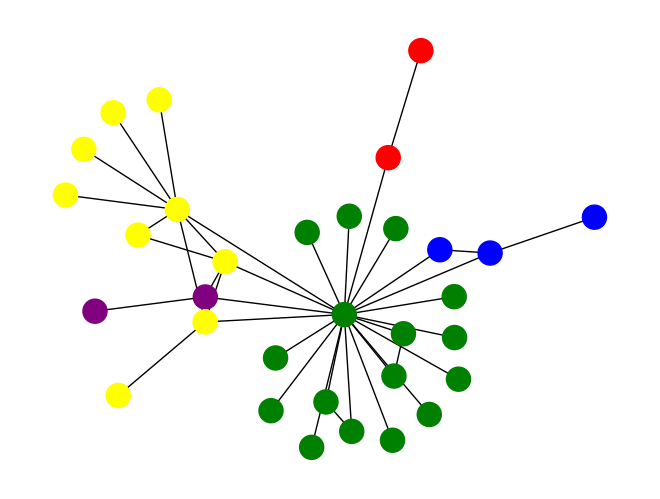

In [121]:
# prompt: cluster analysis of only phase 5

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 5
adjacency_matrix = nx.adjacency_matrix(G[5]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 5
print("Cluster labels for phase 5:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[5], node_color=node_color)
plt.show()



Cluster labels for phase 6:
Node 1: Cluster 1
Node 2: Cluster 1
Node 3: Cluster 1
Node 4: Cluster 1
Node 5: Cluster 1
Node 6: Cluster 5
Node 7: Cluster 1
Node 8: Cluster 1
Node 9: Cluster 5
Node 10: Cluster 2
Node 11: Cluster 1
Node 12: Cluster 4
Node 13: Cluster 5
Node 14: Cluster 3
Node 15: Cluster 3
Node 16: Cluster 3
Node 17: Cluster 1
Node 18: Cluster 3
Node 19: Cluster 3
Node 20: Cluster 3
Node 21: Cluster 1
Node 22: Cluster 2
Node 23: Cluster 2
Node 24: Cluster 1
Node 25: Cluster 1
Node 26: Cluster 4
Node 27: Cluster 2


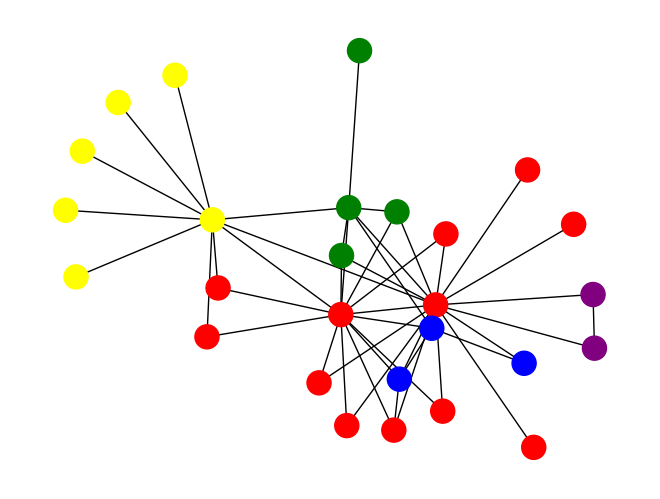

In [122]:
# prompt: cluster analysis of only phase 6

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 6
adjacency_matrix = nx.adjacency_matrix(G[6]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 6
print("Cluster labels for phase 6:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[6], node_color=node_color)
plt.show()


Cluster labels for phase 7:
Node 1: Cluster 2
Node 2: Cluster 2
Node 3: Cluster 2
Node 4: Cluster 5
Node 5: Cluster 2
Node 6: Cluster 5
Node 7: Cluster 5
Node 8: Cluster 2
Node 9: Cluster 2
Node 10: Cluster 2
Node 11: Cluster 2
Node 12: Cluster 2
Node 13: Cluster 2
Node 14: Cluster 3
Node 15: Cluster 2
Node 16: Cluster 1
Node 17: Cluster 4
Node 18: Cluster 2
Node 19: Cluster 4
Node 20: Cluster 4
Node 21: Cluster 2
Node 22: Cluster 3
Node 23: Cluster 2
Node 24: Cluster 2
Node 25: Cluster 1
Node 26: Cluster 4
Node 27: Cluster 5
Node 28: Cluster 3
Node 29: Cluster 2
Node 30: Cluster 3
Node 31: Cluster 2
Node 32: Cluster 4
Node 33: Cluster 4
Node 34: Cluster 2
Node 35: Cluster 2
Node 36: Cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


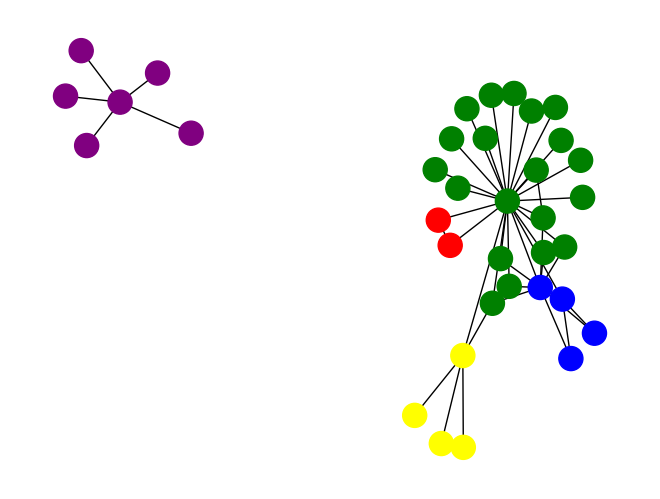

In [123]:
# prompt: cluster analysis of only phase 7

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 7
adjacency_matrix = nx.adjacency_matrix(G[7]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 7
print("Cluster labels for phase 7:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[7], node_color=node_color)
plt.show()


Cluster labels for phase 8:
Node 1: Cluster 1
Node 2: Cluster 1
Node 3: Cluster 1
Node 4: Cluster 1
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 3
Node 8: Cluster 1
Node 9: Cluster 1
Node 10: Cluster 5
Node 11: Cluster 4
Node 12: Cluster 3
Node 13: Cluster 3
Node 14: Cluster 1
Node 15: Cluster 1
Node 16: Cluster 2
Node 17: Cluster 2
Node 18: Cluster 1
Node 19: Cluster 2
Node 20: Cluster 2
Node 21: Cluster 2
Node 22: Cluster 1
Node 23: Cluster 5
Node 24: Cluster 5
Node 25: Cluster 1
Node 26: Cluster 4
Node 27: Cluster 1
Node 28: Cluster 2
Node 29: Cluster 2
Node 30: Cluster 1
Node 31: Cluster 4
Node 32: Cluster 1
Node 33: Cluster 4
Node 34: Cluster 5
Node 35: Cluster 4
Node 36: Cluster 5
Node 37: Cluster 4
Node 38: Cluster 2
Node 39: Cluster 2
Node 40: Cluster 2
Node 41: Cluster 4
Node 42: Cluster 1


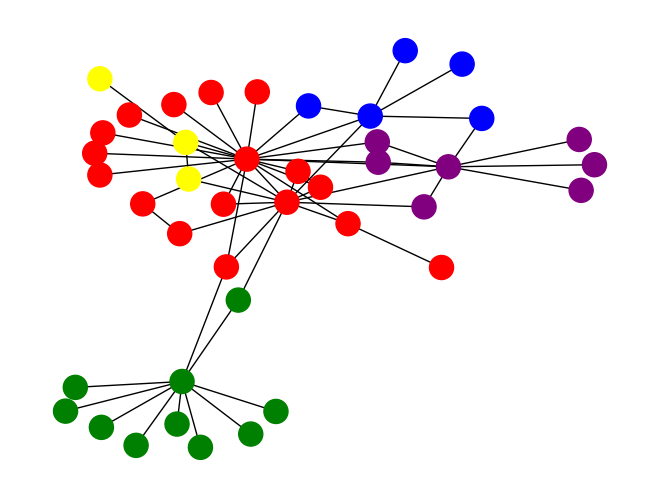

In [124]:
# prompt: cluster analysis of only phase 8

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 8
adjacency_matrix = nx.adjacency_matrix(G[8]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 8
print("Cluster labels for phase 8:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[8], node_color=node_color)
plt.show()

Cluster labels for phase 9:
Node 1: Cluster 1
Node 2: Cluster 1
Node 3: Cluster 1
Node 4: Cluster 1
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 1
Node 8: Cluster 1
Node 9: Cluster 4
Node 10: Cluster 1
Node 11: Cluster 1
Node 12: Cluster 1
Node 13: Cluster 1
Node 14: Cluster 2
Node 15: Cluster 2
Node 16: Cluster 2
Node 17: Cluster 2
Node 18: Cluster 2
Node 19: Cluster 5
Node 20: Cluster 4
Node 21: Cluster 3
Node 22: Cluster 4
Node 23: Cluster 2
Node 24: Cluster 3
Node 25: Cluster 1
Node 26: Cluster 3
Node 27: Cluster 5
Node 28: Cluster 5
Node 29: Cluster 5
Node 30: Cluster 2
Node 31: Cluster 5
Node 32: Cluster 3
Node 33: Cluster 4
Node 34: Cluster 3


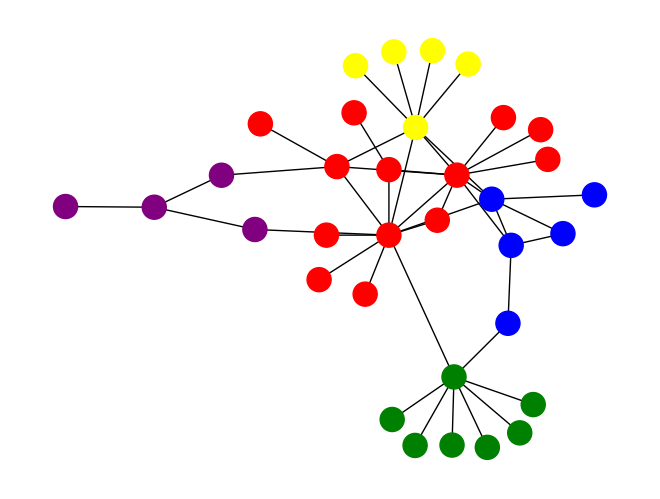

In [125]:
# prompt: cluster analysis of only phase 9

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 9
adjacency_matrix = nx.adjacency_matrix(G[9]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 9
print("Cluster labels for phase 9:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[9], node_color=node_color)
plt.show()

Cluster labels for phase 10:
Node 1: Cluster 1
Node 2: Cluster 1
Node 3: Cluster 1
Node 4: Cluster 1
Node 5: Cluster 1
Node 6: Cluster 1
Node 7: Cluster 1
Node 8: Cluster 3
Node 9: Cluster 1
Node 10: Cluster 1
Node 11: Cluster 5
Node 12: Cluster 5
Node 13: Cluster 5
Node 14: Cluster 5
Node 15: Cluster 2
Node 16: Cluster 3
Node 17: Cluster 2
Node 18: Cluster 5
Node 19: Cluster 5
Node 20: Cluster 2
Node 21: Cluster 2
Node 22: Cluster 2
Node 23: Cluster 2
Node 24: Cluster 5
Node 25: Cluster 5
Node 26: Cluster 2
Node 27: Cluster 2
Node 28: Cluster 2
Node 29: Cluster 2
Node 30: Cluster 2
Node 31: Cluster 4
Node 32: Cluster 4
Node 33: Cluster 2
Node 34: Cluster 2
Node 35: Cluster 2
Node 36: Cluster 2
Node 37: Cluster 3
Node 38: Cluster 2
Node 39: Cluster 2
Node 40: Cluster 2
Node 41: Cluster 5
Node 42: Cluster 1


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


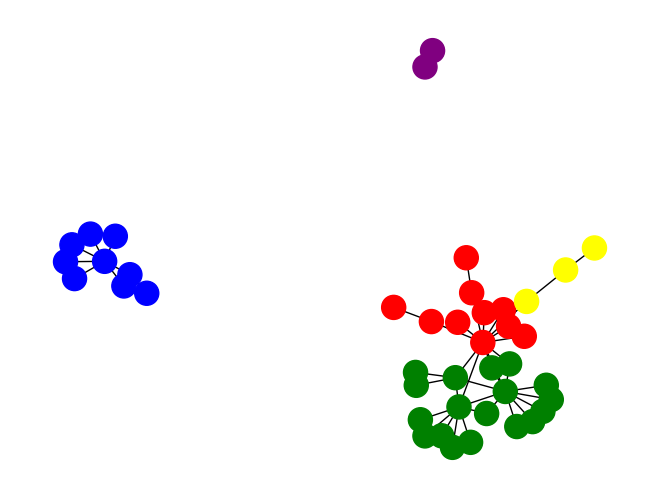

In [126]:
# prompt: cluster analysis of only phase 10

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 10
adjacency_matrix = nx.adjacency_matrix(G[10]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 10
print("Cluster labels for phase 10:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[10], node_color=node_color)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Cluster labels for phase 11:
Node 1: Cluster 1
Node 2: Cluster 2
Node 3: Cluster 3
Node 4: Cluster 1
Node 5: Cluster 1
Node 6: Cluster 2
Node 7: Cluster 1
Node 8: Cluster 1
Node 9: Cluster 1
Node 10: Cluster 3
Node 11: Cluster 3
Node 12: Cluster 5
Node 13: Cluster 3
Node 14: Cluster 3
Node 15: Cluster 1
Node 16: Cluster 4
Node 17: Cluster 1
Node 18: Cluster 4
Node 19: Cluster 1
Node 20: Cluster 3
Node 21: Cluster 1
Node 22: Cluster 4
Node 23: Cluster 3
Node 24: Cluster 1
Node 25: Cluster 5
Node 26: Cluster 5
Node 27: Cluster 1
Node 28: Cluster 1
Node 29: Cluster 4
Node 30: Cluster 3
Node 31: Cluster 3
Node 32: Cluster 3
Node 33: Cluster 3
Node 34: Cluster 3
Node 35: Cluster 4
Node 36: Cluster 1
Node 37: Cluster 3
Node 38: Cluster 3
Node 39: Cluster 3
Node 40: Cluster 3
Node 41: Cluster 3


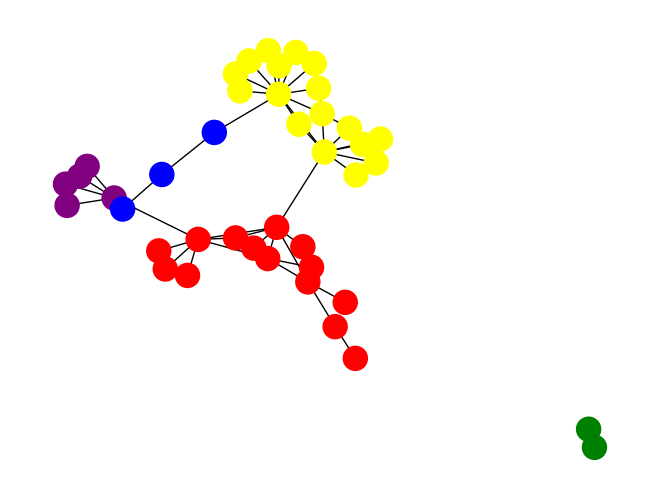

In [127]:
# prompt: cluster analysis of only phase 11

import matplotlib.pyplot as plt
# Extract the adjacency matrix for phase 11
adjacency_matrix = nx.adjacency_matrix(G[11]).toarray()

# Perform spectral clustering on the adjacency matrix
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)

# Print the cluster labels for phase 11
print("Cluster labels for phase 11:")
for i, cluster in enumerate(clusters):
    print(f"Node {i+1}: Cluster {cluster+1}")

# Visualize the clusters using different colors for each cluster
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')

nx.draw(G[11], node_color=node_color)
plt.show()

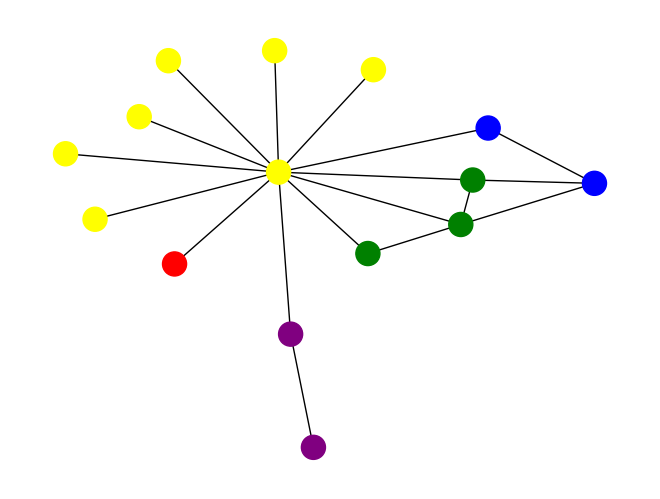

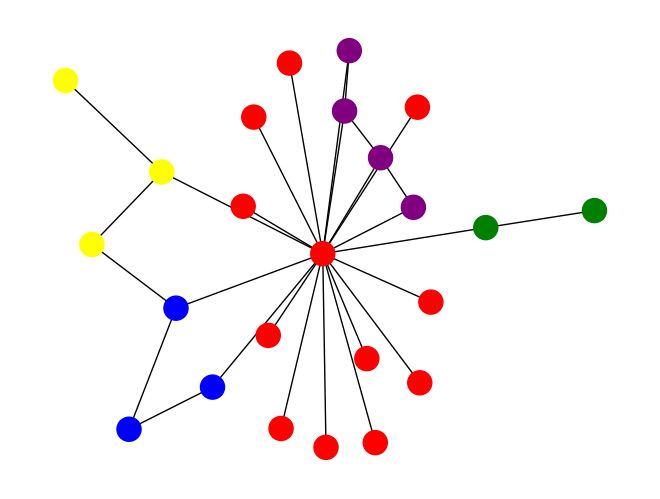

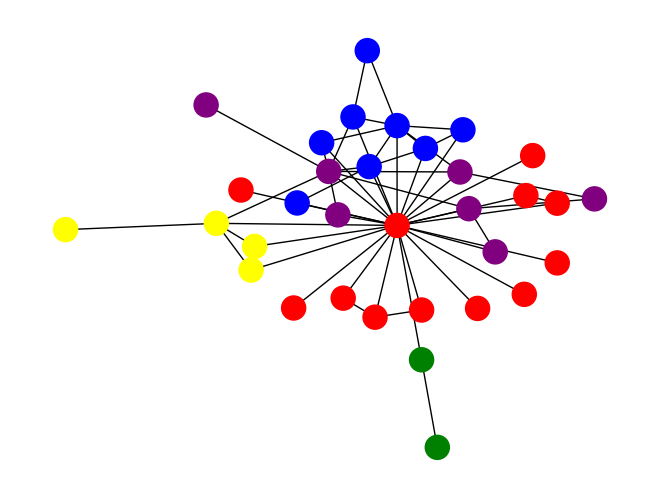

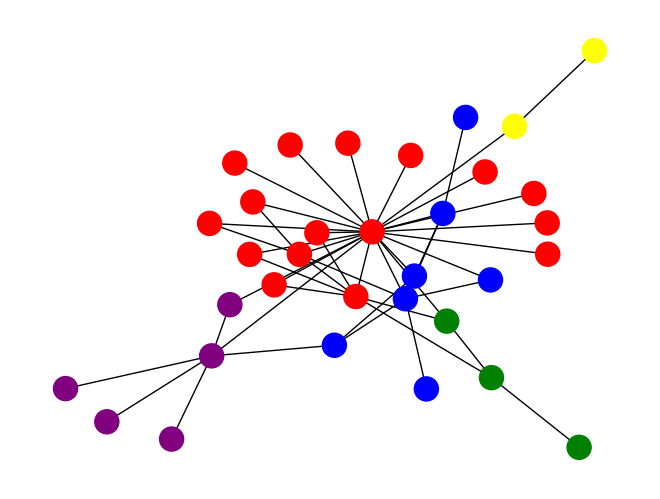

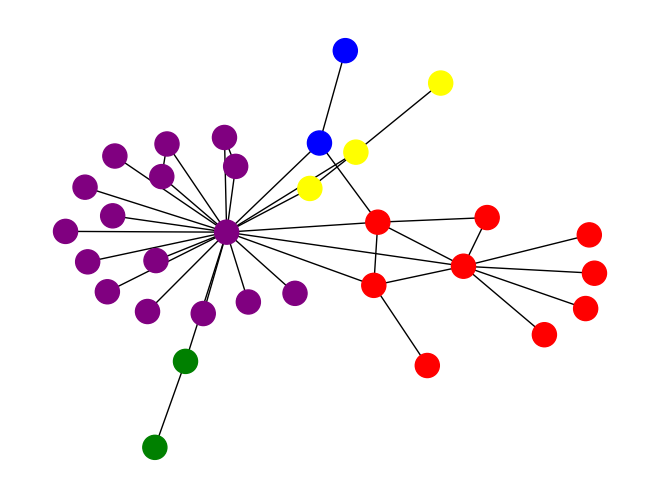

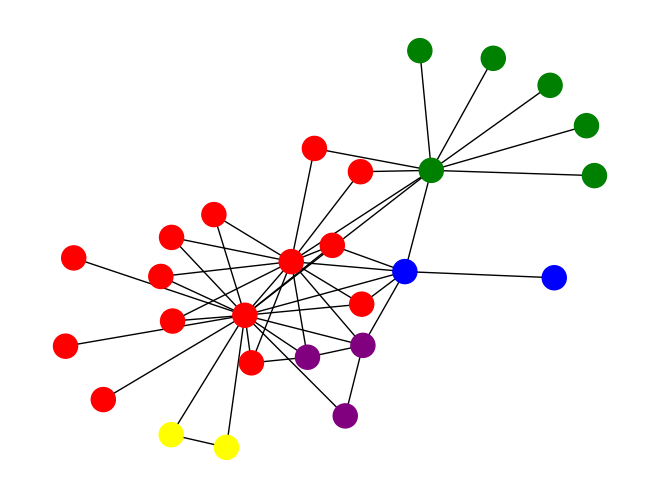

In [128]:
# prompt: show these cluster diagrams #1-6

import matplotlib.pyplot as plt
for i in range(1,7):
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()
  clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  node_color = []
  for j in range(len(clusters)):
      if clusters[j] == 0:
          node_color.append('red')
      elif clusters[j] == 1:
          node_color.append('green')
      elif clusters[j] == 2:
          node_color.append('yellow')
      elif clusters[j] == 3:
          node_color.append('purple')
      else:
          node_color.append('blue')
  nx.draw(G[i], node_color=node_color)
  plt.show()



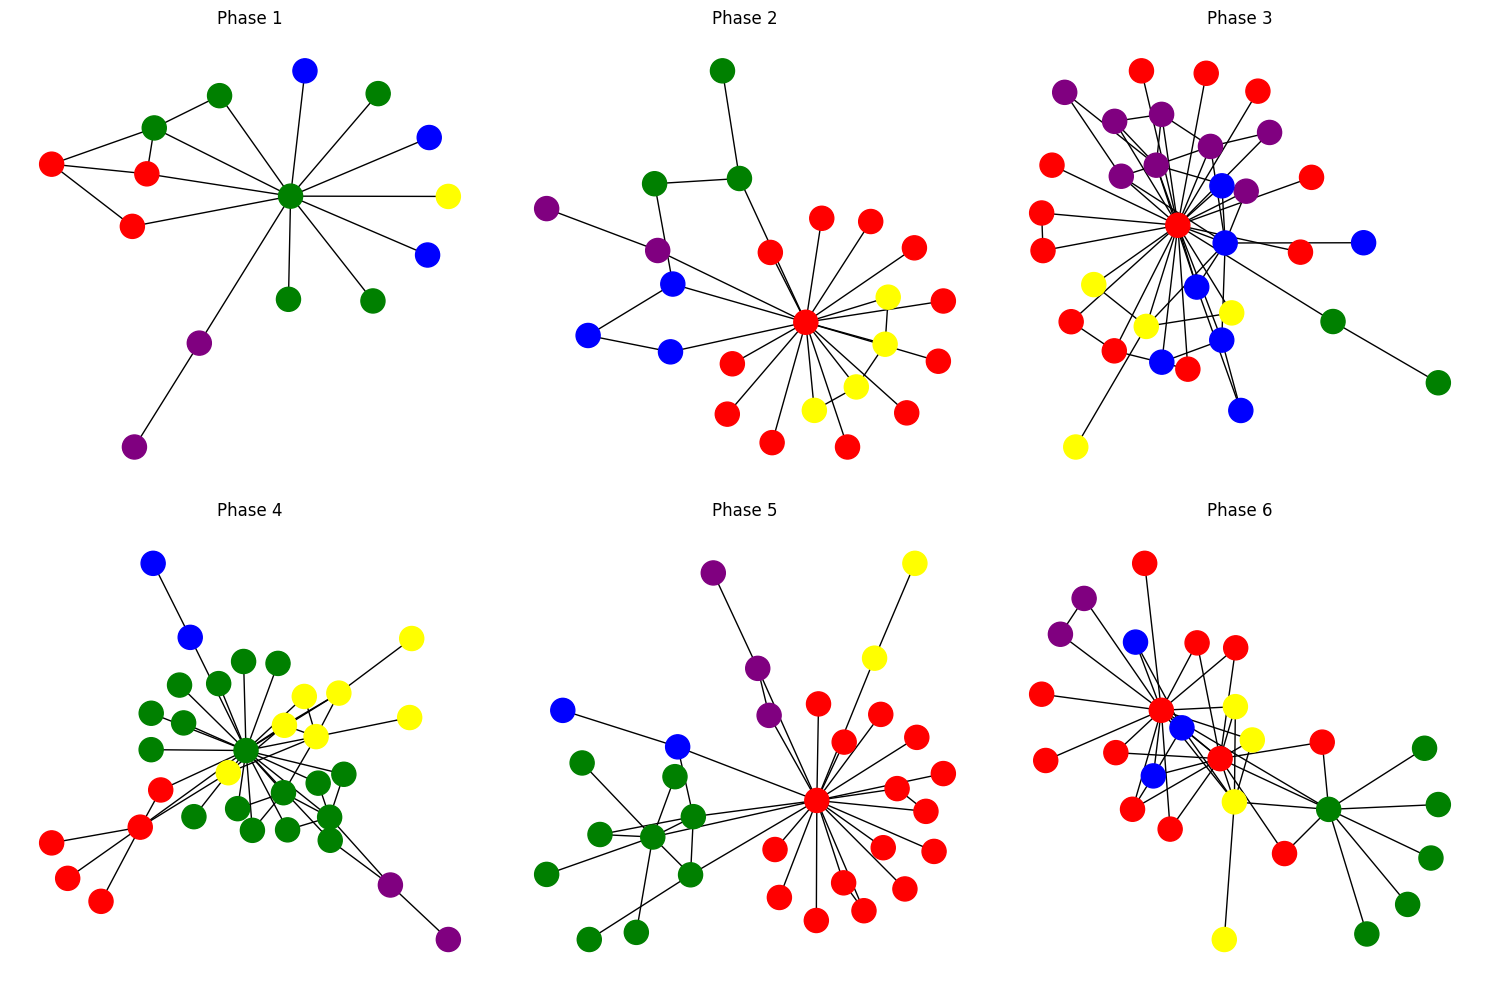

In [129]:
# prompt: show phases #1=6 again, display them so they all fit on screen

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
  adjacency_matrix = nx.adjacency_matrix(G[i+1]).toarray()
  clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  node_color = []
  for j in range(len(clusters)):
      if clusters[j] == 0:
          node_color.append('red')
      elif clusters[j] == 1:
          node_color.append('green')
      elif clusters[j] == 2:
          node_color.append('yellow')
      elif clusters[j] == 3:
          node_color.append('purple')
      else:
          node_color.append('blue')
  nx.draw(G[i+1], ax=ax, node_color=node_color)
  ax.set_title(f'Phase {i+1}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


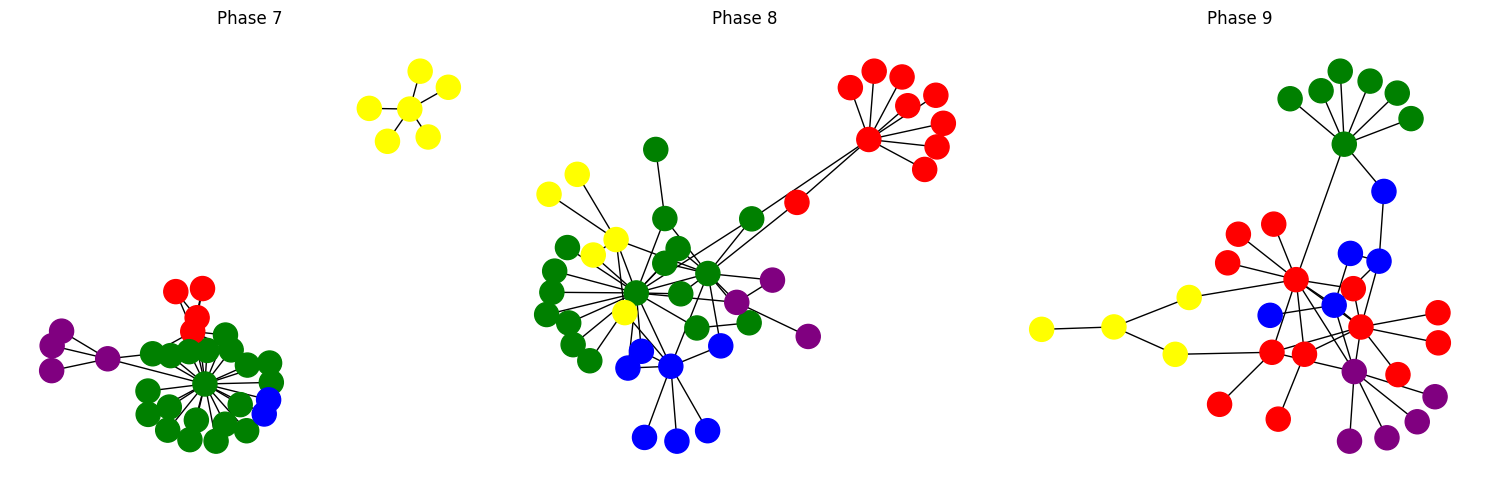

In [130]:
# prompt: same now for phases 7, 8, 9

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes.flat):
  adjacency_matrix = nx.adjacency_matrix(G[i+7]).toarray()
  clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  node_color = []
  for j in range(len(clusters)):
      if clusters[j] == 0:
          node_color.append('red')
      elif clusters[j] == 1:
          node_color.append('green')
      elif clusters[j] == 2:
          node_color.append('yellow')
      elif clusters[j] == 3:
          node_color.append('purple')
      else:
          node_color.append('blue')
  nx.draw(G[i+7], ax=ax, node_color=node_color)
  ax.set_title(f'Phase {i+7}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


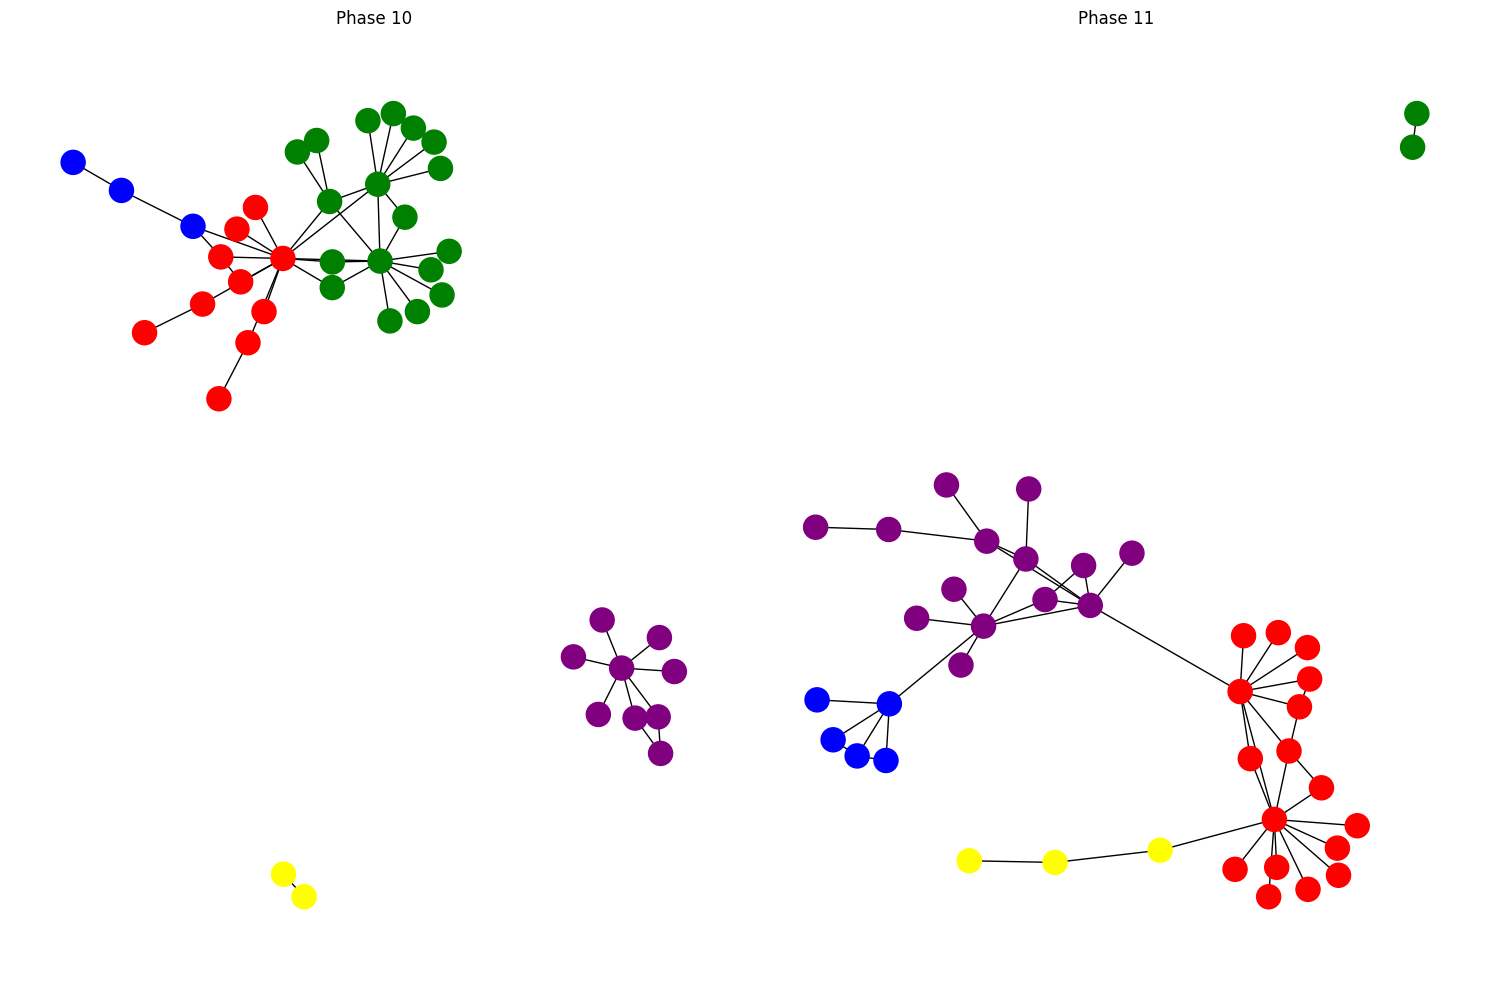

In [131]:
# prompt: show phases 10 and 11

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

adjacency_matrix = nx.adjacency_matrix(G[10]).toarray()
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')
nx.draw(G[10], ax=axes[0], node_color=node_color)
axes[0].set_title('Phase 10')

adjacency_matrix = nx.adjacency_matrix(G[11]).toarray()
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
node_color = []
for i in range(len(clusters)):
    if clusters[i] == 0:
        node_color.append('red')
    elif clusters[i] == 1:
        node_color.append('green')
    elif clusters[i] == 2:
        node_color.append('yellow')
    elif clusters[i] == 3:
        node_color.append('purple')
    else:
        node_color.append('blue')
nx.draw(G[11], ax=axes[1], node_color=node_color)
axes[1].set_title('Phase 11')

plt.tight_layout()
plt.show()


In [202]:
# prompt: calculated the modularity of each graph

import pandas as pd
import networkx as nx

# Define the phases
phases = {}
G = {}
for i in range(1, 12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col=["players"])
  phases[i].columns = phases[i].columns
  phases[i].index = phases[i].index
  phases[i][phases[i] > 0] = 1
  phases[i].columns = [individuals.get(int(j),j) for j in phases[i].columns]
  phases[i].index = [individuals.get(int(j),j) for j in phases[i].index]
    # rename(index=individuals, columns=individuals, inplace=True)

  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

# Calculate the modularity of each graph
for i in range(1, 12):
  modularity = nx.community.modularity(G[i], nx.community.greedy_modularity_communities(G[i]))
  print(f"Modularity of phase {i}: {modularity}")


Modularity of phase 1: 0.2854938271604939
Modularity of phase 2: 0.3386479591836735
Modularity of phase 3: 0.341358418367347
Modularity of phase 4: 0.40386284722222215
Modularity of phase 5: 0.4138724523339908
Modularity of phase 6: 0.2770484382073336
Modularity of phase 7: 0.45460224906289043
Modularity of phase 8: 0.45080261593341264
Modularity of phase 9: 0.48992768595041314
Modularity of phase 10: 0.5970000000000001
Modularity of phase 11: 0.6183999999999998


In [147]:
# prompt: show the individuals of each of the clusters #1-5 made above for phase 10 and phase 11, include those not connected, individual 0 does not exist

# Phase 10 clusters

cluster_1_phase_10 = []
cluster_2_phase_10 = []
cluster_3_phase_10 = []
cluster_4_phase_10 = []
cluster_5_phase_10 = []

for i, cluster in enumerate(clusters):
  if cluster == 0:
    cluster_1_phase_10.append(individuals.get(i+1, i+1))
  elif cluster == 1:
    cluster_2_phase_10.append(individuals.get(i+1, i+1))
  elif cluster == 2:
    cluster_3_phase_10.append(individuals.get(i+1, i+1))
  elif cluster == 3:
    cluster_4_phase_10.append(individuals.get(i+1, i+1))
  else:
    cluster_5_phase_10.append(individuals.get(i+1, i+1))

print("Phase 10:")
print("Cluster 1:", cluster_1_phase_10)
print("Cluster 2:", cluster_2_phase_10)
print("Cluster 3:", cluster_3_phase_10)
print("Cluster 4:", cluster_4_phase_10)
print("Cluster 5:", cluster_5_phase_10)

# Phase 11 clusters

cluster_1_phase_11 = []
cluster_2_phase_11 = []
cluster_3_phase_11 = []
cluster_4_phase_11 = []
cluster_5_phase_11 = []

for i, cluster in enumerate(clusters):
  if cluster == 0:
    cluster_1_phase_11.append(individuals.get(i+1, i+1))
  elif cluster == 1:
    cluster_2_phase_11.append(individuals.get(i+1, i+1))
  elif cluster == 2:
    cluster_3_phase_11.append(individuals.get(i+1, i+1))
  elif cluster == 3:
    cluster_4_phase_11.append(individuals.get(i+1, i+1))
  else:
    cluster_5_phase_11.append(individuals.get(i+1, i+1))

print("\nPhase 11:")
print("Cluster 1:", cluster_1_phase_11)
print("Cluster 2:", cluster_2_phase_11)
print("Cluster 3:", cluster_3_phase_11)
print("Cluster 4:", cluster_4_phase_11)
print("Cluster 5:", cluster_5_phase_11)


Phase 10:
Cluster 1: ['Johnny Pacheco', 'n18', 'n22', 'n29', 'n35']
Cluster 2: ['Pierre Perlini', 'n10', 'Samir Rabbat', 'n13', 'n14', 'n20', 'n23', 'n30', 'n31', 'n32', 'Ricardo Negrinotti', 'n34', 'n37', 'n38', 'n39', 'n40', 'n41']
Cluster 3: ['n2', 'Gaspard Lino']
Cluster 4: ['Daniel Serero', 'n4', 'Richard Gleeson', 'n7', 'Bruno de Quinzio', 'n9', 'n15', 'Oscar Nieri', 'n19', 'n21', 'n24', 'n27', 'n28', 'n36']
Cluster 5: ['Ernesto Morales', 'n25', 'n26']

Phase 11:
Cluster 1: ['Johnny Pacheco', 'n18', 'n22', 'n29', 'n35']
Cluster 2: ['Pierre Perlini', 'n10', 'Samir Rabbat', 'n13', 'n14', 'n20', 'n23', 'n30', 'n31', 'n32', 'Ricardo Negrinotti', 'n34', 'n37', 'n38', 'n39', 'n40', 'n41']
Cluster 3: ['n2', 'Gaspard Lino']
Cluster 4: ['Daniel Serero', 'n4', 'Richard Gleeson', 'n7', 'Bruno de Quinzio', 'n9', 'n15', 'Oscar Nieri', 'n19', 'n21', 'n24', 'n27', 'n28', 'n36']
Cluster 5: ['Ernesto Morales', 'n25', 'n26']


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


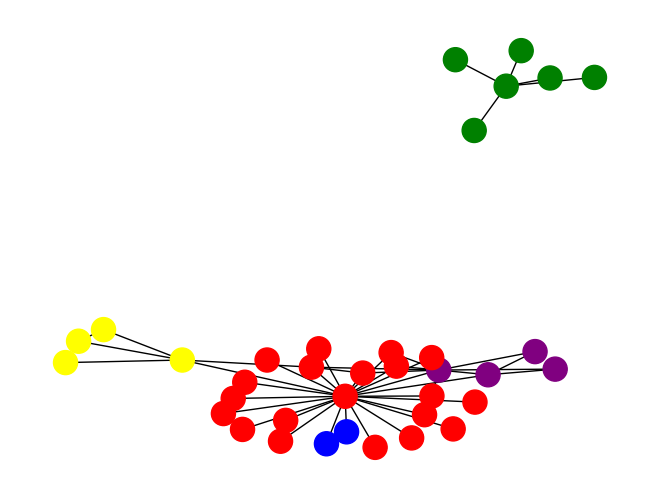

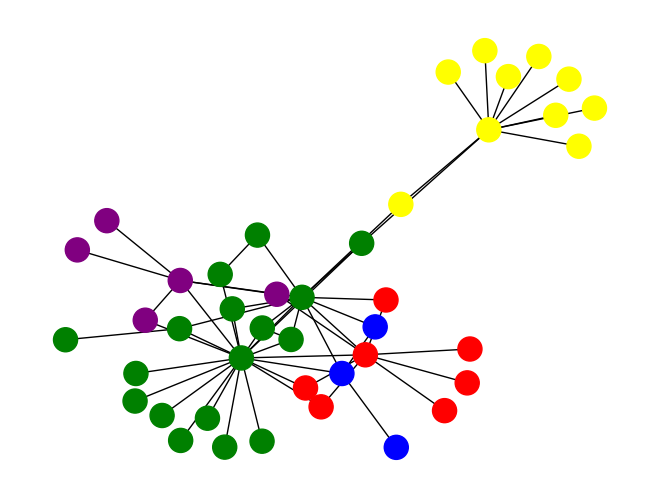

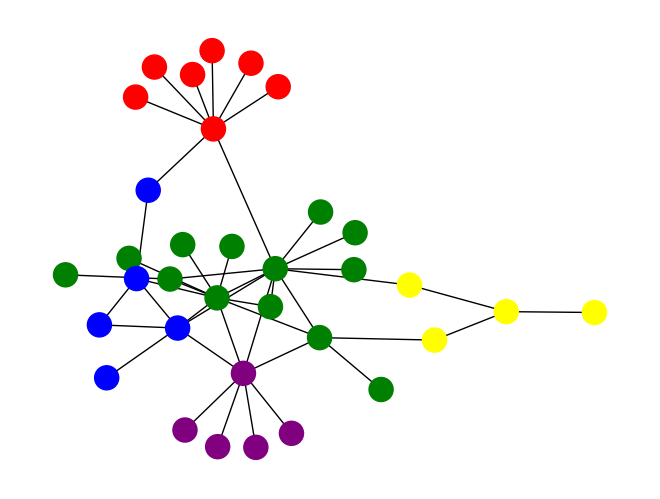

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


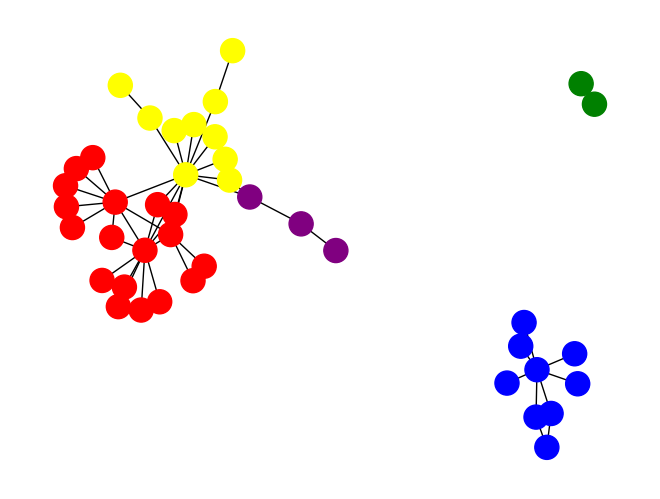

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


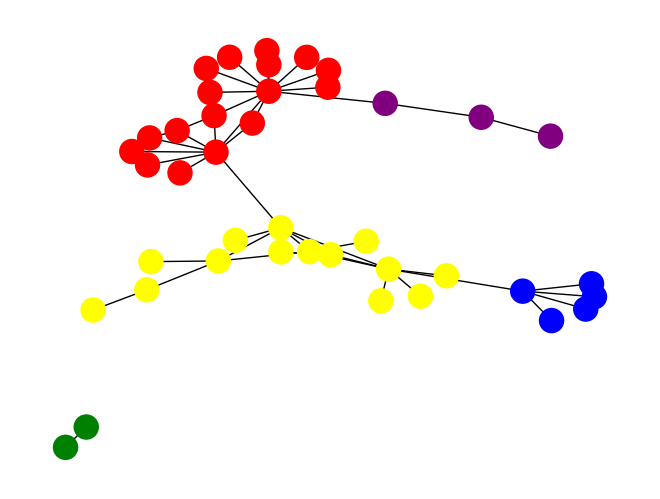

In [51]:
# prompt: show phases 7-11

import matplotlib.pyplot as plt
for i in range(7, 12):
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()
  clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  node_color = []
  for j in range(len(clusters)):
      if clusters[j] == 0:
          node_color.append('red')
      elif clusters[j] == 1:
          node_color.append('green')
      elif clusters[j] == 2:
          node_color.append('yellow')
      elif clusters[j] == 3:
          node_color.append('purple')
      else:
          node_color.append('blue')
  nx.draw(G[i], node_color=node_color)
  plt.show()


In [146]:
# prompt: list the individuals (from the list of individuals list n1:n110) in each cluster 1-5 for phase 10 and phase 11, there is no n0

# Phase 10
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(nx.adjacency_matrix(G[10]).toarray())

for i in range(5):
  cluster_members = [str(individuals.get(int(j),j)) for j, cluster in enumerate(clusters) if cluster == i] # Convert all elements to string
  print(f"Cluster {i+1}: {', '.join(cluster_members)}")

# Phase 11
clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(nx.adjacency_matrix(G[11]).toarray())

for i in range(5):
  cluster_members = [str(individuals.get(int(j),j)) for j, cluster in enumerate(clusters) if cluster == i] # Convert all elements to string
  print(f"Cluster {i+1}: {', '.join(cluster_members)}")


Cluster 1: n10, Samir Rabbat, Ernesto Morales, n13, Oscar Nieri, n18, n23, n24, n40
Cluster 2: n14, Johnny Pacheco, n19, n20, n21, n22, n25, n26, n27, n28, n29, n32, Ricardo Negrinotti, n34, n35, n37, n38, n39
Cluster 3: n30, n31
Cluster 4: 0, Daniel Serero, n2, Pierre Perlini, n4, Richard Gleeson, Gaspard Lino, Bruno de Quinzio, n9, n41
Cluster 5: n7, n15, n36
Cluster 1: n15, Oscar Nieri, n21, n28, n34
Cluster 2: n2, n9, n10, Ernesto Morales, n13, n19, n22, n29, n30, n31, n32, Ricardo Negrinotti, n36, n37, n38, n39, n40
Cluster 3: Daniel Serero, Richard Gleeson
Cluster 4: 0, Pierre Perlini, n4, Gaspard Lino, n7, Bruno de Quinzio, n14, Johnny Pacheco, n18, n20, n23, n26, n27, n35
Cluster 5: Samir Rabbat, n24, n25


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [204]:
# prompt: now list only the clusters that include 'Daniel Serero', print all members of each clusters

# Initialize an empty dictionary to store clusters and their nodes
cluster_nodes = {}

# Loop through each phase
for i in range(1, 11):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  if i < 8:
      clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  else:
      clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Initialize an empty list for the current phase's clusters
  cluster_nodes[i] = {}

  # Loop through each cluster
  for cluster in set(clusters):
    # Initialize an empty list for the current cluster
    cluster_nodes[i][cluster] = []

    # Find nodes belonging to the current cluster
    for node_index, cluster_label in enumerate(clusters):
      if cluster_label == cluster:
        # Get the node name from the index
        node_name = list(G[i].nodes)[node_index]
        cluster_nodes[i][cluster].append(node_name)

# Print the clusters and their nodes
for phase, clusters in cluster_nodes.items():
  for cluster, nodes in clusters.items():
    if 'Daniel Serero' in nodes:
      print(f"Phase {phase}, Cluster {cluster + 1}: {', '.join(nodes)}")


Phase 1, Cluster 1: Daniel Serero, n4, n2, n54, n64, Bruno de Quinzio
Phase 2, Cluster 1: Daniel Serero, Richard Gleeson, n90, Gérard Levy, n2, n55, n56, n97, n47, n98, n9, Ernesto Morales
Phase 3, Cluster 3: Daniel Serero, Antonio Iannacci, n48, n2, n7, n55, n10, n56, n34, n35, n32, n50
Phase 4, Cluster 5: Daniel Serero, n4, Alain Levy, Richard Gleeson, Lee Gilbert, Wallace Lee, Gérard Levy, n2, Gaspard Lino, n47, Gabrielle Casale, Samir Rabbat, n53, Mohammed Echouafni, n52, Beverly Ashton, n15
Phase 5, Cluster 3: Daniel Serero, n4, Richard Gleeson, n2, Gaspard Lino, Bruno de Quinzio, n55, n47, n34, Samir Rabbat, Mohammed Echouafni, n108, n100, Salvatore Panetta, n19, n15
Phase 6, Cluster 1: Daniel Serero, n4, Alain Levy, Pierre Perlini, Richard Gleeson, n2, Gaspard Lino, n9, n14, Salvatore Panetta, Roderik Janouska, Patrick Lee
Phase 7, Cluster 2: Daniel Serero, n4, Alain Levy, Richard Gleeson, n62, n9, n2, Gaspard Lino, Bruno de Quinzio, n55, n34, n14, n19, Roderik Janouska, Patrick

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
# prompt:  list only the clusters that include 'Pierre Perlini', print all members of each clusters

# Initialize an empty dictionary to store clusters and their nodes
cluster_nodes = {}

# Loop through each phase
for i in range(1, 11):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  if i < 8:
      clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  else:
      clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Initialize an empty list for the current phase's clusters
  cluster_nodes[i] = {}

  # Loop through each cluster
  for cluster in set(clusters):
    # Initialize an empty list for the current cluster
    cluster_nodes[i][cluster] = []

    # Find nodes belonging to the current cluster
    for node_index, cluster_label in enumerate(clusters):
      if cluster_label == cluster:
        # Get the node name from the index
        node_name = list(G[i].nodes)[node_index]
        cluster_nodes[i][cluster].append(node_name)

# Print the clusters and their nodes
for phase, clusters in cluster_nodes.items():
  for cluster, nodes in clusters.items():
    if 'Pierre Perlini' in nodes:
      print(f"Phase {phase}, Cluster {cluster + 1}: {', '.join(nodes)}")


In [ ]:
# prompt:  list only the clusters that include 'Ernesto Morales', print all members of each clusters

# Initialize an empty dictionary to store clusters and their nodes
cluster_nodes = {}

# Loop through each phase
for i in range(1, 11):
  # Extract the adjacency matrix for the current phase
  adjacency_matrix = nx.adjacency_matrix(G[i]).toarray()

  # Perform spectral clustering on the adjacency matrix
  if i < 8:
      clusters = SpectralClustering(n_clusters=5, affinity='precomputed').fit_predict(adjacency_matrix)
  else:
      clusters = SpectralClustering(n_clusters=3, affinity='precomputed').fit_predict(adjacency_matrix)

  # Initialize an empty list for the current phase's clusters
  cluster_nodes[i] = {}

  # Loop through each cluster
  for cluster in set(clusters):
    # Initialize an empty list for the current cluster
    cluster_nodes[i][cluster] = []

    # Find nodes belonging to the current cluster
    for node_index, cluster_label in enumerate(clusters):
      if cluster_label == cluster:
        # Get the node name from the index
        node_name = list(G[i].nodes)[node_index]
        cluster_nodes[i][cluster].append(node_name)

# Print the clusters and their nodes
for phase, clusters in cluster_nodes.items():
  for cluster, nodes in clusters.items():
    if 'Ernesto Morales' in nodes:
      print(f"Phase {phase}, Cluster {cluster + 1}: {', '.join(nodes)}")
